파이썬 머신러닝 완벽가이드 ch6. 4 ~ 5 pg. 396 ~ 408



---



## 04 SVD(Single Value Decomposition)

### SVD 개요

- PCA와 유사한 행렬 분해 기법을 사용
- 차이점
>- PCA : 정방행렬만을 고유벡터로 분해
>- SVD : 행과 열의 크기가 다른 행렬에서도 적용할 수 있다. (m x n)

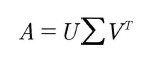

- SVD를 특이값 분해 라고도 한다.
- 행렬 U와 V에 속한 벡터는 특이벡터
> 모든 특이벡터는 서로 직교하는 성질을 가진다.
- ∑는 대각행렬
> - 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0
>- ∑이 위치한 0이 아닌 값이 행렬 A의 특이값
- SVD는 A의 차원이 m x n일때 U의 차원이 m x m, ∑의 차원이 m x n, V.T의 차원이 nxn이 되도록 분해

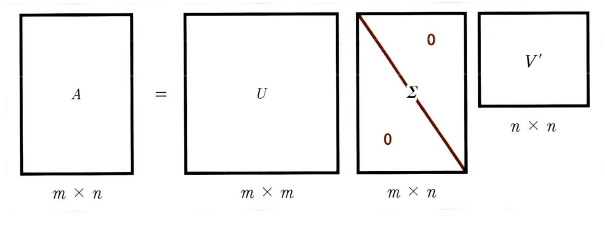

일반적으로는 ∑의 비대각 부분과 대각 원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 ∑에 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용


이렇게 컴팩트한 형태로 SVD를 적용하면 A의 차원이 m x n일 때, U의 차원을 m x p, ∑의 차원을 p x p, V.T의 차원을 p x n으로 분해한다.

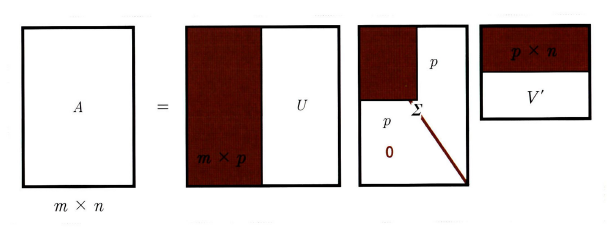

Truncated SVD는 ∑의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것이다.

- 랜덤 행렬을 생성하는 이유 : 행렬의 개별 로우끼리의 의존성을 없애기 위해.

In [1]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4X4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 이렇게 생성된 a 행렬에 SVD를 적용해 U, Sigma, Vt를 도출.
- SVD 분해는 np.linalg.svd에 파라미터로 원본 행렬을 입력하면 U 행렬, Sigma 행렬, V 전치 행렬을 반환한다.
- Sigma 행렬의 경우, 행렬의 대각에 위치한 값만 0이 아니고 그렇지 않은 겨우는 모두 0이므로 -이 아닌 값의 경우만 1차원 행렬로 표현한다.

In [2]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('V transpose matrix:\n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


- U 행렬이 4x4, Vt 행렬이 4x4 반환
- Sigma의 경우는 1차원 행렬인 (4,)로 반환

분해된 행렬들이 원본 행렬로 복원되는지 확인
- sigma의 경우 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함함 대칭행렬로 변환한 뒤에 내적을 수행

In [3]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 원본 행렬과 동일하게 복원됨을 알 수 있다.

데이터 세트가 로우 간 의존성이 있을 경우, 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 확인
- 일부러 의존성을 부여하기 위해 a 행렬의 3번째 로우를 '첫 번째 로우 + 두 번째 로우'로 업데이트하고, 4번째 로우는 첫 번째 로우와 같다고 업데이트

In [4]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [5]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


- 이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변함.
- 즉, 선형 독림인 로의 벡터의 개수가 2개라는 의미. 행렬의 랭크가 2
- 다시 복원해보자. (전체 데이터를 이용하지 않고, Sigma의 0에 대응되는 데이터를 제외하고 복원)

In [6]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


Truncated SVD를 이용한 생렬 분해
- Truncated SVD : ∑ 행렬에 있는 대각 원소(특이값) 중 상위 일부 데이터만을 추출해 분해하는 방식
- 이렇게 분해하면 인위적으로 더 작은 차원의 U, ∑ V.t로 분해하기 때문에 원본 행렬을 정확하게 원복할 수는 없다.
- 하지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있다.
- 원래의 차수에 가깝게 잘래낼수록 원본 행렬에 더 가깝게 복원할 수 있다.

Truncated SVD 모듈
- 넘파이가 아닌 사이파이에서만 지원
- 일반적으로 사이파이의 SVD는 scipy.linalg.svd를 이용하면 되지만, Truncated SVD는 희소 행렬로만 지원돼서 scipy.sparse.linalg.svds를 이용해야 한다.

임의의 원본 행렬 6x6을 Normal SVD로 분해해 분해된 행렬의 차원과 Sigma 행렬 내 트기값을 확인한 뒤 다시 Truncated SVD로 분해해 분해된 행렬의 차원, Sigma 행렬 내의 특이값, 그리고 Truncated SVD로 분해된 행렬의 내적을 계싼하여 다시 복원된 데이터와 원본 데이터를 비교하자.

In [8]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

- 6X6 행렬을 SVD 분해하면, U, sigma, Vt가 각각 (6,6) (6,) (6,6) 차원이지만, Truncated SVD의 num_components를 4로 설정해 분해하면 (6,4) (4,) (4,6)으로 분해
- Truncated SV로 분해된 행렬로 다시 복원할 경우, 완벽하게 복원되지 않고 근사적으로 복원됨을 알 수 있다.

### 사이킷런 TruncatedSVD 클래스를 이용한 변환

- 사이킷런의 TruncatedSVD 클래스는 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt 행렬을 반환하지는 않는다.
- fit()과 transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원을 축소해 변환한다.
- 원본 데이터를 Truncated SVD 방식으로 분해된 U*Sigma 행렬에 선형 변환해 생성

Text(0, 0.5, 'TruncatedSVD Component 2')

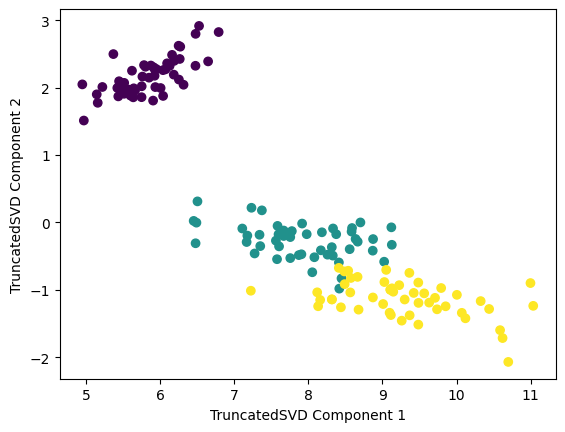

In [10]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

- TruncatedSVD 변환 역시 PCA와 유사하게 변환 후에 품종별로 어느정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음을 알 수 있다.

사이킷런의 TruncatedSVD와 PCA 클래스 구현을 조금 더 자세히 들여다보면 두 개 클래스 모두 SVD를 이용해 행렬을 분해한다.

붓꽃 데이터를 스케일링으로 변환한 뒤에 TruncatedSVD와 PCA 클래스를 변환해보면 두개가 거의 동일하다.


Text(0.5, 1.0, 'PCA Transformed')

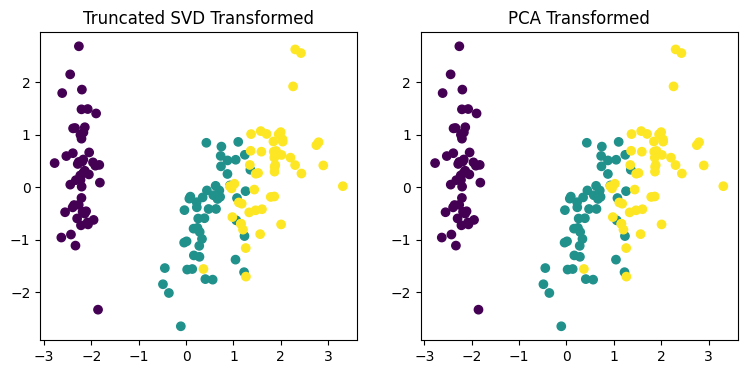

In [11]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

- 두 개의 변환 행렬 값과 원복 속성별 컴포넌트 비율값을 실제로 서로 비교해 보면 거의 같음을 알 수 있다.

In [12]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3364990497931616e-15
2.0816681711721685e-17


- 모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있다.
- 즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다.
- 이는 PCA가 SVD 알고리즘으로 구현됐음을 의미
- 하지만 PCA는 밀집 행렬에 대한 변환만 가능, SVD는 희소 행렬에 대한 변환도 가능하다.

## 05 NMF(Non-NegativeMatrix Factorization)

### NMF 개요

- NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형
- NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는게 보장된다면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭.

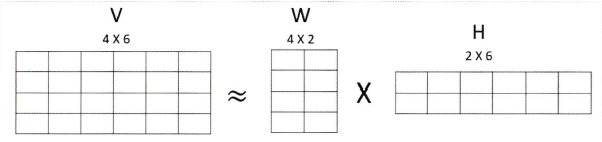

- 4x6 원본 행렬 V는 4x2 행렬 W와 2x6 행렬 H로 근사해 분해될 수 있다.
- 행렬 분해는 일반적으로 SVDㅘ 같은 행렬 분해 기법을 통칭
- 이처럼 행렬 분해를 하게되면 W 행렬과 H 행렬은 일반적으로 길고 가는 행렬 W와 작고 넓은 행렬 H로 분해된다.
- 이렇게 분해된 행렬은 잠재 요소를 특성으로 가진다.
- 분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지 대응하며, 분해 행렬 H는 이 잠재 요소가 원본 열로 어떻게 구성됐는지를 나타내는 행렬

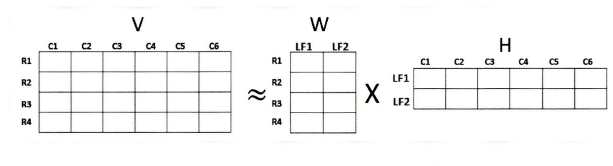

- 사이킷런에서 NMF 클래스를 이용해 지원

Text(0, 0.5, 'NMF Component 2')

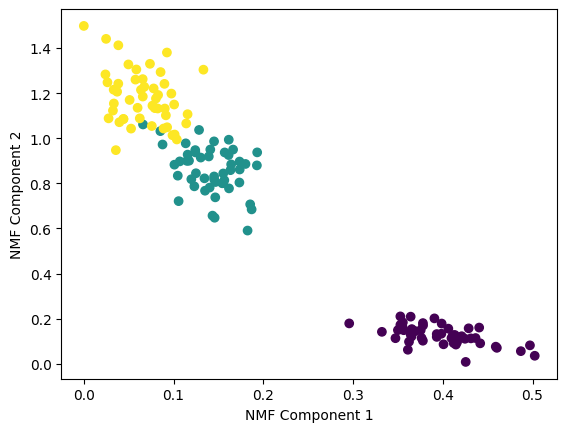

In [13]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

## 06 정리

대표적인 차원 축소 알고리즘 : PCA, LDA, SVD, NMF
- PCA
> - 입력 데이터의 변동성이 가장 큰 축을 구하고, 다시 이 축에 직각인 축을 반복적으로 축소하려는 차원 개수만큼 구한 뒤 입력 데이터를 이축들에 투영해 차원을 축소하는 방식
>- 이를 위해 입력 데이터의 공분산 행렬을 기반으로 고유 벡터를 생성하고 이렇게 구한 고유 벡터에 입력 데이터를 선형 변환하는 방식

- LDA
>- PCA가 입력 데이터 변동성의 가장 큰 축을 찾는 데 반해 LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원 축소

- SVD와 NMF
>- 매우 많은 피처를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법
>- 원본 행렬에서 잠재된 요소를 추출